In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import lmfit

In [2]:
%cd C:\Users\jdhare\Google Drive\MAGPIE\data\2017
data=np.genfromtxt('channel_1_polariser_calibration.txt', delimiter=',', skip_header=1)

C:\Users\jdhare\Google Drive\MAGPIE\data\2017


In [3]:
angle=data[data[:,0].argsort(),0]
counts=data[data[:,0].argsort(),1]/1e3

In [4]:
def polariser(I0, theta0, theta, background):
    t=theta*np.pi/180
    t0=theta0*np.pi/180
    return I0*(np.sin(t-t0))**2+background

In [14]:
mod=lmfit.Model(polariser, independent_vars=['theta'])
mod.set_param_hint('background', value = counts.min(), min=0)
mod.set_param_hint('I0', value = 2.8e6,min=0)
mod.set_param_hint('theta0', value = angle[counts.argmin()],min=0, max=180)

res=mod.fit(counts, theta=angle)

<IPython.core.display.Javascript object>


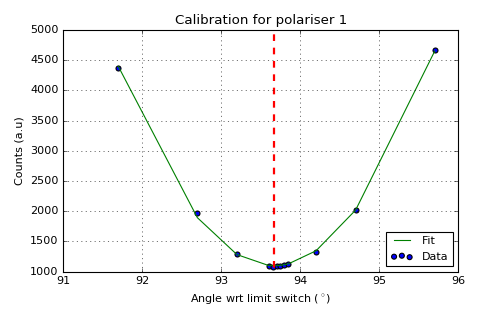

[[Model]]
    Model(polariser)
[[Fit Statistics]]
    # function evals   = 15
    # data points      = 12
    # variables        = 3
    chi-square         = 8095.929
    reduced chi-square = 899.548
    Akaike info crit   = 84.171
    Bayesian info crit = 85.625
[[Variables]]
    I0:           2.8124e+06 +/- 1.98e+04 (0.70%) (init= 2800000)
    theta0:       93.6630847 +/- 0.005398 (0.01%) (init= 93.65)
    background:   1097.74288 +/- 10.15329 (0.92%) (init= 1081.89)
[[Correlations]] (unreported correlations are <  0.100)
    C(I0, background)            = -0.520 



In [26]:
fig,ax=plt.subplots(figsize=(6,4))
ax.plot(angle, res.best_fit, label='Fit', c='green')
ax.scatter(angle, counts, label='Data')

ax.plot([res.best_values['theta0'],res.best_values['theta0']],[0,10000], ls='--', lw=2, c='red')
ax.set_ylim([1e3,5e3])
#ax.set_xlim([93.15,94.25])
ax.set_ylabel('Counts (a.u)')
ax.set_xlabel(r'Angle wrt limit switch ($^\circ{}$)', fontsize=10)
ax.legend(loc=4)
ax.grid(True)
ax.set_title('Calibration for polariser 1')
plt.tight_layout()

print(res.fit_report())

In [13]:
fig.savefig('Polariser 1 calibration.png')

In [27]:
%cd C:\Users\jdhare\Google Drive\MAGPIE\data\2017
data=np.genfromtxt('channel_2_polariser_calibration.txt', delimiter=',', skip_header=1)
angle=data[data[:,0].argsort(),0]
counts=data[data[:,0].argsort(),1]/1e3

C:\Users\jdhare\Google Drive\MAGPIE\data\2017


In [28]:
mod=lmfit.Model(polariser, independent_vars=['theta'])
mod.set_param_hint('background', value = counts.min(), min=0)
mod.set_param_hint('I0', value = 2.8e6,min=0)
mod.set_param_hint('theta0', value = angle[counts.argmin()],min=0, max=180)

res=mod.fit(counts, theta=angle)

<IPython.core.display.Javascript object>


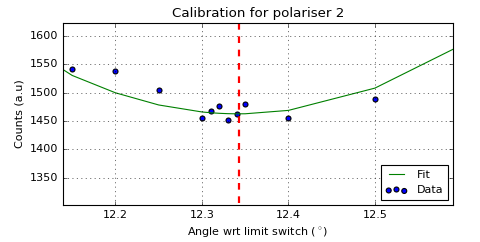

[[Model]]
    Model(polariser)
[[Fit Statistics]]
    # function evals   = 18
    # data points      = 16
    # variables        = 3
    chi-square         = 8310.001
    reduced chi-square = 639.231
    Akaike info crit   = 106.042
    Bayesian info crit = 108.360
[[Variables]]
    I0:           5.9926e+06 +/- 6.95e+04 (1.16%) (init= 2800000)
    theta0:       12.3424781 +/- 0.006098 (0.05%) (init= 12.33)
    background:   1462.51478 +/- 6.934650 (0.47%) (init= 1451.52)
[[Correlations]] (unreported correlations are <  0.100)
    C(I0, theta0)                = -0.754 
    C(I0, background)            = -0.323 



In [29]:
fig,ax=plt.subplots(figsize=(6,4))
ax.plot(angle, res.best_fit, label='Fit', c='green')
ax.scatter(angle, counts, label='Data')

ax.plot([res.best_values['theta0'],res.best_values['theta0']],[0,10000], ls='--', lw=2, c='red')
ax.set_ylim([1e3,5e3])
#ax.set_xlim([93.15,94.25])
ax.set_ylabel('Counts (a.u)')
ax.set_xlabel(r'Angle wrt limit switch ($^\circ{}$)', fontsize=10)
ax.legend(loc=4)
ax.grid(True)
ax.set_title('Calibration for polariser 2')
plt.tight_layout()

print(res.fit_report())